<a href="https://colab.research.google.com/github/laysch/verizon-fwa/blob/main/Verizon2_Polina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation Step




Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/BTT

Mounted at /content/drive
/content/drive/MyDrive/BTT




*   Opening File





In [ ]:
df=pd.read_csv("Area_Table_June_2021_Status_V.csv")

<ipython-input-3-c3f134955683>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Area_Table_June_2021_Status_V.csv")


#Cleaning Data
-It the code below I replaced Column 'tech' where 1 is where Wireles Internet is available and 0 where it is not

-Filtered 'type' to only show data with COUNTY variable

-Also I replaced Urban with 1 and Rural with 0

In [ ]:
df.head(10)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
0,place,100100,acfosw,R,N,0.2,0,0,0,193
1,place,100124,acfosw,R,N,0.2,0,0,0,2639
2,place,100460,acfosw,R,N,0.2,0,0,0,659
3,place,100460,acfosw,U,N,0.2,0,0,0,3912
4,place,100484,acfosw,R,N,0.2,0,0,0,752
5,place,100676,acfosw,R,N,0.2,0,0,0,356
6,place,100820,acfosw,R,N,0.2,0,0,0,1403
7,place,100820,acfosw,U,N,0.2,0,0,0,31892
8,place,100988,acfosw,R,N,0.2,0,0,0,2584
9,place,100988,acfosw,U,N,0.2,0,0,0,19251


In [ ]:

df.describe()

,speed,has_0,has_1,has_2,has_3more
count,2.381180e+07,2.381180e+07,2.381180e+07,2.381180e+07,2.381180e+07
mean,1.984571e+02,9.606321e+03,8.180652e+03,5.675227e+03,1.169427e+04
std,3.375425e+02,5.286337e+05,4.194392e+05,3.055594e+05,6.367718e+05
min,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.500000e+01,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.500000e+02,4.660000e+02,2.650000e+02,9.100000e+01,3.130000e+02
max,1.000000e+03,2.650367e+08,2.347864e+08,2.059187e+08,2.647923e+08


In [ ]:
df_tech=df["tech"]


In [ ]:
df_tech.head(200)


0      acfosw
1      acfosw
2      acfosw
3      acfosw
4      acfosw
        ...  
195    acfosw
196    acfosw
197    acfosw
198    acfosw
199    acfosw
Name: tech, Length: 200, dtype: object

In [ ]:
nan_count=np.sum(df.isnull(),axis=0)
print(nan_count)
df.drop_duplicates(inplace=True)


type           0
id             0
tech           0
urban_rural    0
tribal_non     0
speed          0
has_0          0
has_1          0
has_2          0
has_3more      0
dtype: int64


#Replacing all values that has Wireless Internet with 1 and without W with 0

In [ ]:
df.replace({"tech": {"w": 1}},regex=True, inplace=True)
df.replace({"tech": {"a": 0, "c":0, "f": 0, "o": 0, "s": 0  }},regex=True, inplace=True)
df.head(20)


,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
0,place,100100,1,R,N,0.2,0,0,0,193
1,place,100124,1,R,N,0.2,0,0,0,2639
2,place,100460,1,R,N,0.2,0,0,0,659
3,place,100460,1,U,N,0.2,0,0,0,3912
4,place,100484,1,R,N,0.2,0,0,0,752
5,place,100676,1,R,N,0.2,0,0,0,356
6,place,100820,1,R,N,0.2,0,0,0,1403
7,place,100820,1,U,N,0.2,0,0,0,31892
8,place,100988,1,R,N,0.2,0,0,0,2584
9,place,100988,1,U,N,0.2,0,0,0,19251


In [ ]:
df.tail(20)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
23811775,nation,0,0,R,N,1000.0,63339381,542034,16556,0
23811776,nation,0,0,R,T,1000.0,2140467,6856,0,0
23811777,nation,0,0,U,N,1000.0,263183395,1769475,83814,0
23811778,nation,0,0,U,T,1000.0,1935067,464,0,0
23811779,nation,0,0,R,N,1000.0,51392839,11645949,837798,21385
23811780,nation,0,0,R,T,1000.0,1614129,464331,67553,1310
23811781,nation,0,0,U,N,1000.0,189258104,69524683,5939345,314552
23811782,nation,0,0,U,T,1000.0,1424460,485607,24653,811
23811783,nation,0,0,R,N,1000.0,63883875,3924,10172,0
23811784,nation,0,0,R,T,1000.0,2147323,0,0,0


1    12094880
0    11716915
Name: tech, dtype: int64


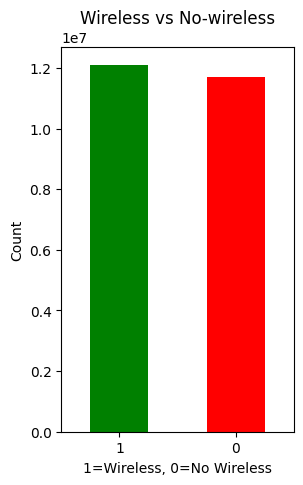

In [ ]:
counts = df['tech'].value_counts()
print(counts)


plt.figure(figsize=(3, 5))
counts.plot(kind='bar', color=['green', 'red'])
plt.title('Wireless vs No-wireless')
plt.xlabel('1=Wireless, 0=No Wireless')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
df_state=df[df['type']=="county"]

In [ ]:
df_state.head(10)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
3390534,state,01,1,R,N,0.2,0,120,54,2037136
3390535,state,01,1,R,T,0.2,0,0,0,282
3390536,state,01,1,U,N,0.2,0,18,20,2883806
3390537,state,01,1,U,T,0.2,0,0,0,1
3390538,state,02,1,R,N,0.2,0,7647,13458,66268
3390539,state,02,1,R,T,0.2,0,3224,46420,125749
3390540,state,02,1,U,N,0.2,0,38,2243,370539
3390541,state,02,1,U,T,0.2,0,3,5242,89849
3390542,state,04,1,R,N,0.2,0,26,42,812788
3390543,state,04,1,R,T,0.2,0,20,23,164191


In [ ]:
df_state.tail(20)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
23811523,state,54,1,R,N,1000.0,907549,586,0,0
23811524,state,54,1,U,N,1000.0,872985,3664,0,0
23811525,state,55,1,R,N,1000.0,1744700,14,0,0
23811526,state,55,1,R,T,1000.0,24593,0,0,0
23811527,state,55,1,U,N,1000.0,4047541,0,0,0
23811528,state,55,1,U,T,1000.0,15699,0,0,0
23811529,state,56,1,R,N,1000.0,202736,8264,0,0
23811530,state,56,1,R,T,1000.0,14029,0,0,0
23811531,state,56,1,U,N,1000.0,295622,49824,0,0
23811532,state,56,1,U,T,1000.0,11847,0,0,0


In [ ]:
df_state.shape

(76293, 10)

1    38752
0    37541
Name: tech, dtype: int64


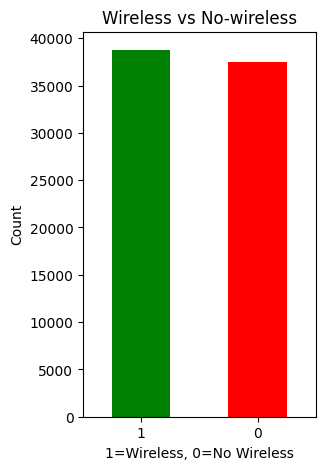

In [ ]:
counts = df_state['tech'].value_counts()
print(counts)


plt.figure(figsize=(3, 5))
counts.plot(kind='bar', color=['green', 'red'])
plt.title('Wireless vs No-wireless')
plt.xlabel('1=Wireless, 0=No Wireless')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
df.replace({"urban_rural": {"U": 1, "R":0}},regex=True, inplace=True)



In [ ]:
df.head(10)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
0,place,100100,1,0,N,0.2,0,0,0,193
1,place,100124,1,0,N,0.2,0,0,0,2639
2,place,100460,1,0,N,0.2,0,0,0,659
3,place,100460,1,1,N,0.2,0,0,0,3912
4,place,100484,1,0,N,0.2,0,0,0,752
5,place,100676,1,0,N,0.2,0,0,0,356
6,place,100820,1,0,N,0.2,0,0,0,1403
7,place,100820,1,1,N,0.2,0,0,0,31892
8,place,100988,1,0,N,0.2,0,0,0,2584
9,place,100988,1,1,N,0.2,0,0,0,19251


In [ ]:
df=df[df['type']=="state"]

In [ ]:
df.head(10)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
3390534,state,01,1,0,N,0.2,0,120,54,2037136
3390535,state,01,1,0,T,0.2,0,0,0,282
3390536,state,01,1,1,N,0.2,0,18,20,2883806
3390537,state,01,1,1,T,0.2,0,0,0,1
3390538,state,02,1,0,N,0.2,0,7647,13458,66268
3390539,state,02,1,0,T,0.2,0,3224,46420,125749
3390540,state,02,1,1,N,0.2,0,38,2243,370539
3390541,state,02,1,1,T,0.2,0,3,5242,89849
3390542,state,04,1,0,N,0.2,0,26,42,812788
3390543,state,04,1,0,T,0.2,0,20,23,164191


In [ ]:
df.head(10)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
3390534,state,01,1,0,N,0.2,0,120,54,2037136
3390535,state,01,1,0,T,0.2,0,0,0,282
3390536,state,01,1,1,N,0.2,0,18,20,2883806
3390537,state,01,1,1,T,0.2,0,0,0,1
3390538,state,02,1,0,N,0.2,0,7647,13458,66268
3390539,state,02,1,0,T,0.2,0,3224,46420,125749
3390540,state,02,1,1,N,0.2,0,38,2243,370539
3390541,state,02,1,1,T,0.2,0,3,5242,89849
3390542,state,04,1,0,N,0.2,0,26,42,812788
3390543,state,04,1,0,T,0.2,0,20,23,164191


In [ ]:
df.shape

(76293, 10)

In [ ]:
df=df[df['speed']>=1.0]

In [ ]:
df.head(10)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
6792219,state,01,1,0,N,4.0,0,128,171347,1865835
6792220,state,01,1,0,T,4.0,0,0,0,282
6792221,state,01,1,1,N,4.0,0,19,26694,2857131
6792222,state,01,1,1,T,4.0,0,0,0,1
6792223,state,02,1,0,N,4.0,5854,11663,21498,48358
6792224,state,02,1,0,T,4.0,10051,41599,28121,95622
6792225,state,02,1,1,N,4.0,41,2415,36187,334177
6792226,state,02,1,1,T,4.0,0,4618,8103,82373
6792227,state,04,1,0,N,4.0,0,26,58210,754620
6792228,state,04,1,0,T,4.0,0,20,13664,150550


In [ ]:
df.shape

(65394, 10)

In [ ]:
df.tail(20)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
23811523,state,54,1,0,N,1000.0,907549,586,0,0
23811524,state,54,1,1,N,1000.0,872985,3664,0,0
23811525,state,55,1,0,N,1000.0,1744700,14,0,0
23811526,state,55,1,0,T,1000.0,24593,0,0,0
23811527,state,55,1,1,N,1000.0,4047541,0,0,0
23811528,state,55,1,1,T,1000.0,15699,0,0,0
23811529,state,56,1,0,N,1000.0,202736,8264,0,0
23811530,state,56,1,0,T,1000.0,14029,0,0,0
23811531,state,56,1,1,N,1000.0,295622,49824,0,0
23811532,state,56,1,1,T,1000.0,11847,0,0,0
